In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")

In [2]:
# ==============================
# PART 1: DATA CLEANING
# ==============================

# 1. Handle Missing Values
# Drop columns with more than 80% missing values
missing_threshold = len(df) * 0.8
df = df.dropna(thresh=missing_threshold, axis=1)

# Fill categorical columns with mode where missing values are below 20%
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().mean() < 0.2:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna("Unknown")

# Fill numerical columns with median values
df.fillna(df.median(numeric_only=True), inplace=True)

# 2. Remove Duplicates
df.drop_duplicates(inplace=True)

# 3. Standardize Column Names
df.columns = df.columns.str.lower().str.replace(r'[^a-z0-9_]', '_', regex=True)

# 4. Convert Date/Time Columns
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df.dropna(subset=['crash_date'], inplace=True)
df['crash_hour'] = df['crash_date'].dt.hour
df['month'] = df['crash_date'].dt.month
df['year'] = df['crash_date'].dt.year
df['day_of_week'] = df['crash_date'].dt.day_name()

# 5. Standardize Categorical Values
if 'weather_condition' in df.columns:
    df['weather_condition'] = df['weather_condition'].str.title()

# 6. Address Outliers (Using IQR)
def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

for col in ['injuries_total', 'injuries_fatal', 'injuries_incapacitating']:
    if col in df.columns:
        cap_outliers(col)

# 7. Save Cleaned Data
df.to_csv("clean_chicago_traffic.csv", index=False)

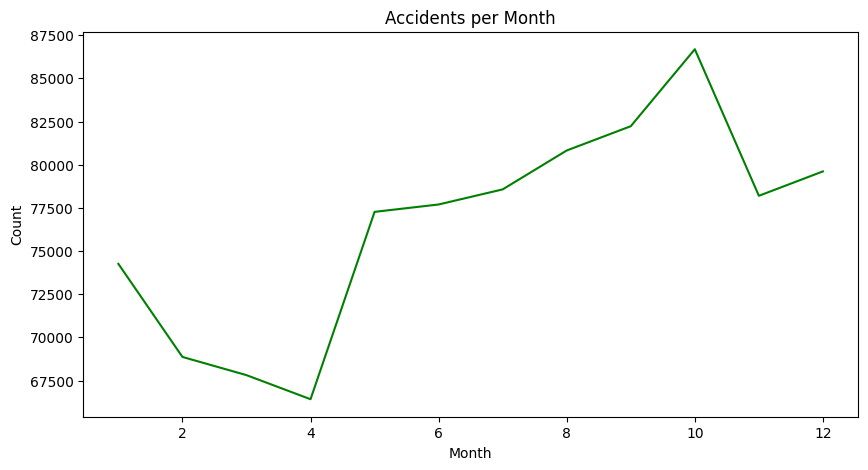

In [3]:
# 1. Accidents per Month
plt.figure(figsize=(10, 5))
df.groupby('month').size().plot(kind='line', color='green')
plt.title("Accidents per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

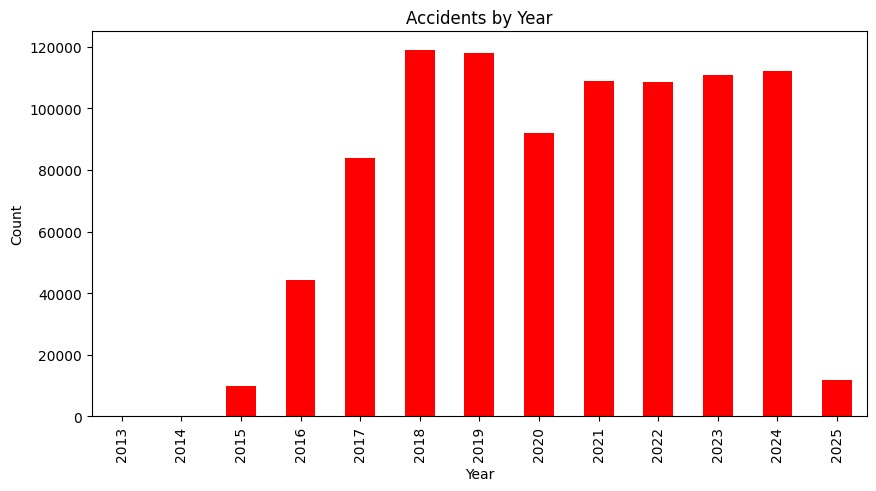

In [4]:
# 2. Accidents by Year
plt.figure(figsize=(10, 5))
df.groupby('year').size().plot(kind='bar',color='Red')
plt.title("Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

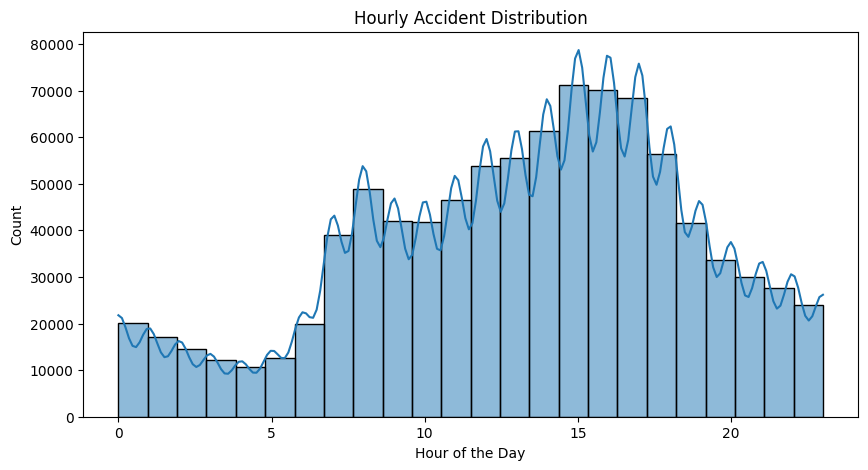

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['crash_hour'], bins=24, kde=True)
plt.title("Hourly Accident Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

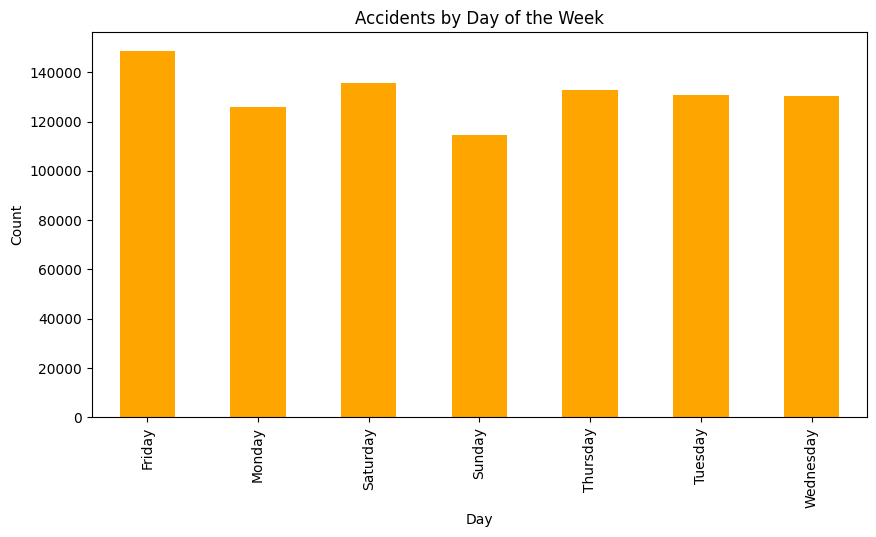

In [6]:
# 4. Accidents by Day of the Week
plt.figure(figsize=(10, 5))
df.groupby('day_of_week').size().plot(kind='bar',color='orange')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

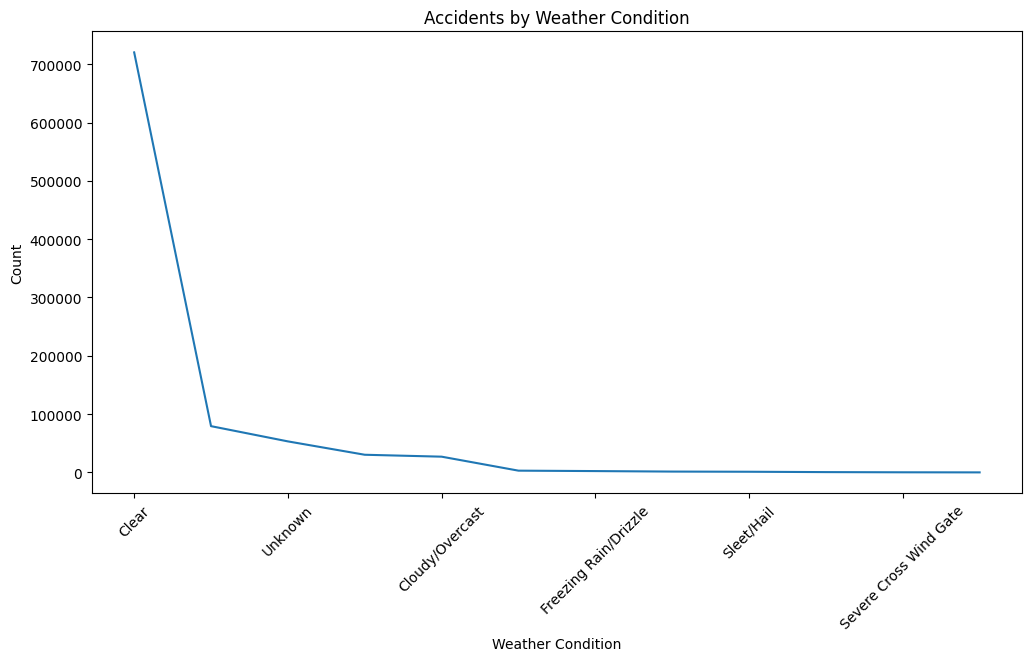

In [7]:
# 5. Accidents by Weather Condition
plt.figure(figsize=(12, 6))
df['weather_condition'].value_counts().plot(kind='line')
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

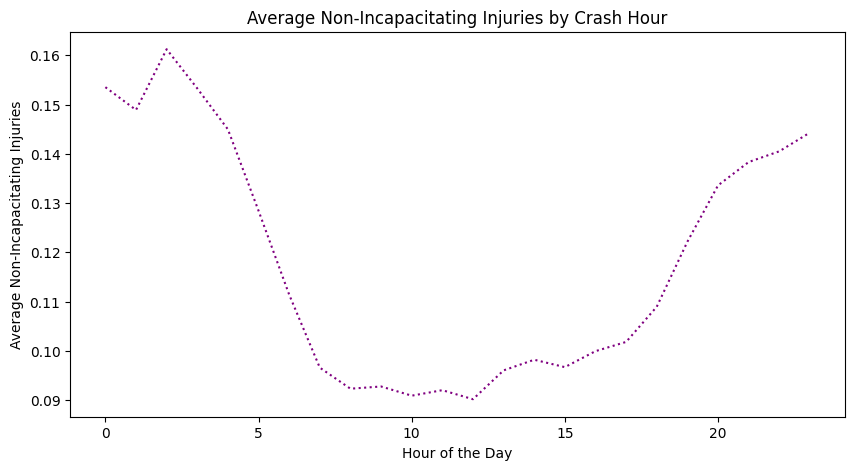

In [8]:
# 6. Distribution of Non-Incapacitating Injuries
plt.figure(figsize=(10, 5))
avg_injuries = df.groupby('crash_hour')['injuries_non_incapacitating'].mean()
avg_injuries.plot(kind='line', linestyle=':', color='purple')
plt.title("Average Non-Incapacitating Injuries by Crash Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Non-Incapacitating Injuries")
plt.show()


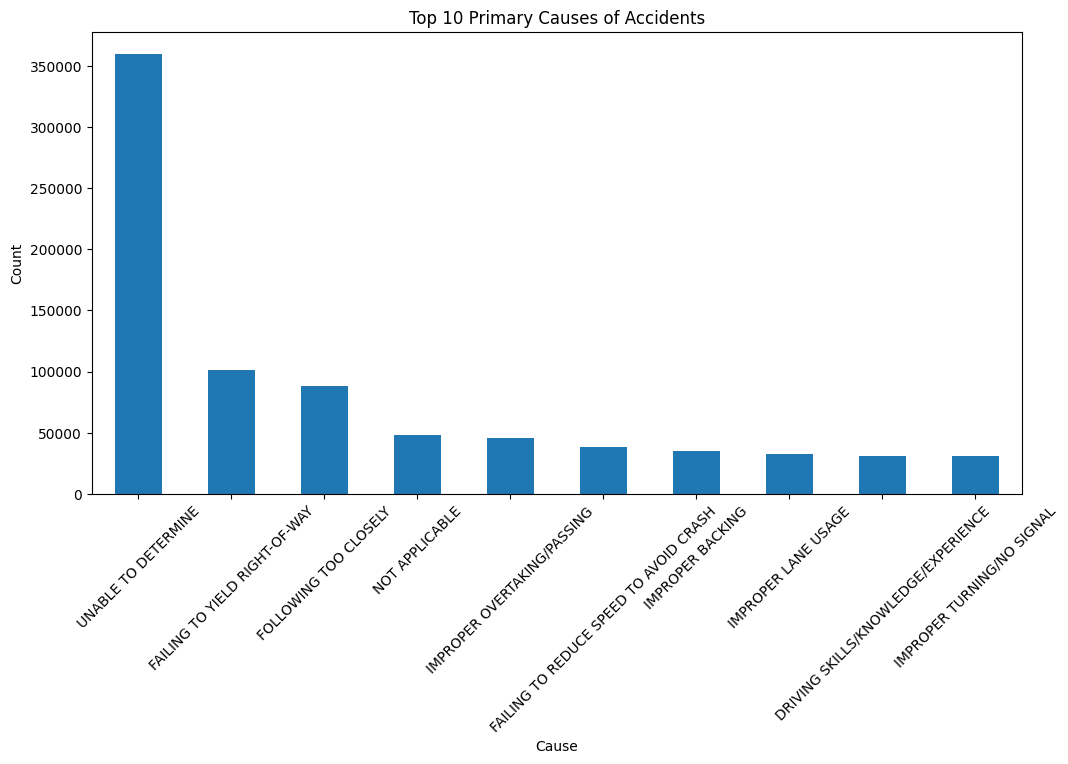

In [9]:
# 7. Accidents by Primary Cause
plt.figure(figsize=(12, 6))
if 'prim_contributory_cause' in df.columns:
    df['prim_contributory_cause'].value_counts().nlargest(10).plot(kind='bar')
    plt.title("Top 10 Primary Causes of Accidents")
    plt.xlabel("Cause")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'prim_contributory_cause' not found in dataset.")

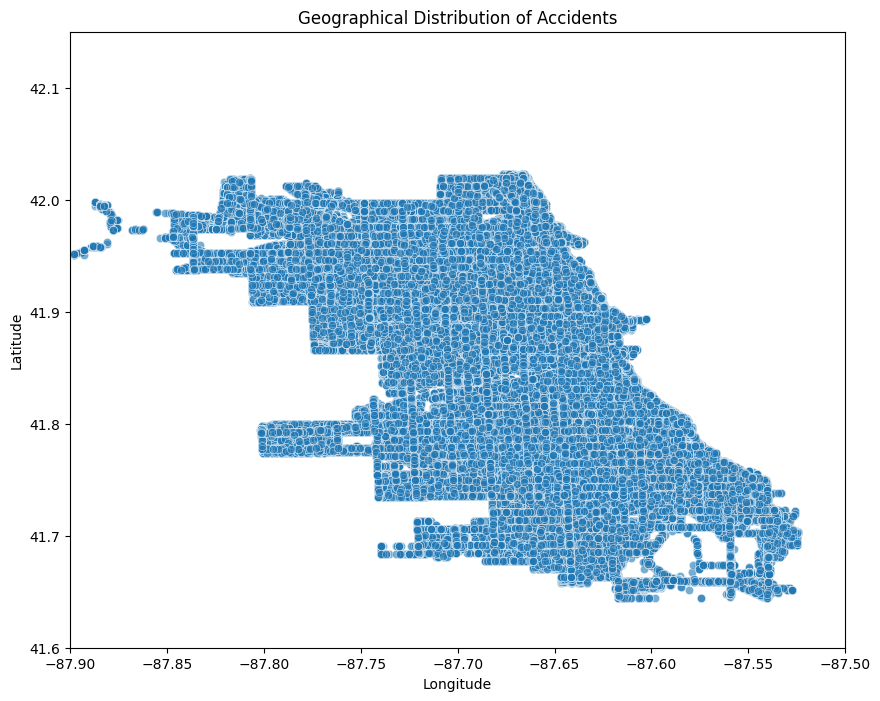

In [10]:
# 8. Geographical Distribution of Accidents
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, alpha=0.6)
plt.title("Geographical Distribution of Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim([41.6, 42.15])
plt.xlim([-87.9, -87.5])
plt.show()

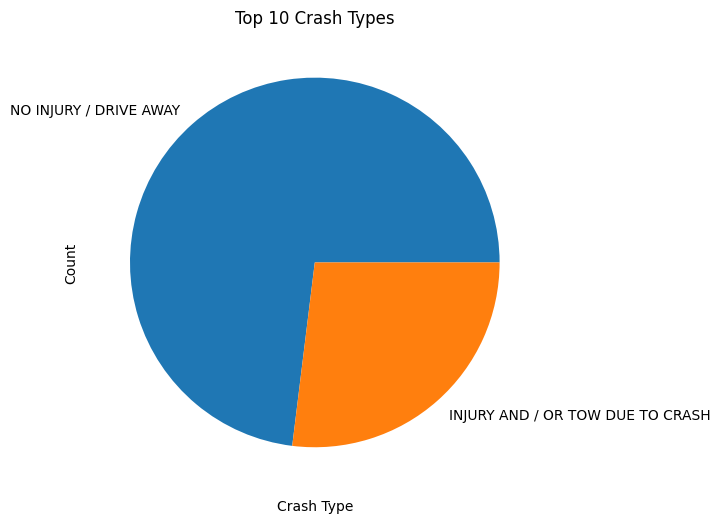

In [11]:
# 9. Crash Types
plt.figure(figsize=(12, 6))
df['crash_type'].value_counts().nlargest(10).plot(kind='pie')
plt.title("Top 10 Crash Types")
plt.xlabel("Crash Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

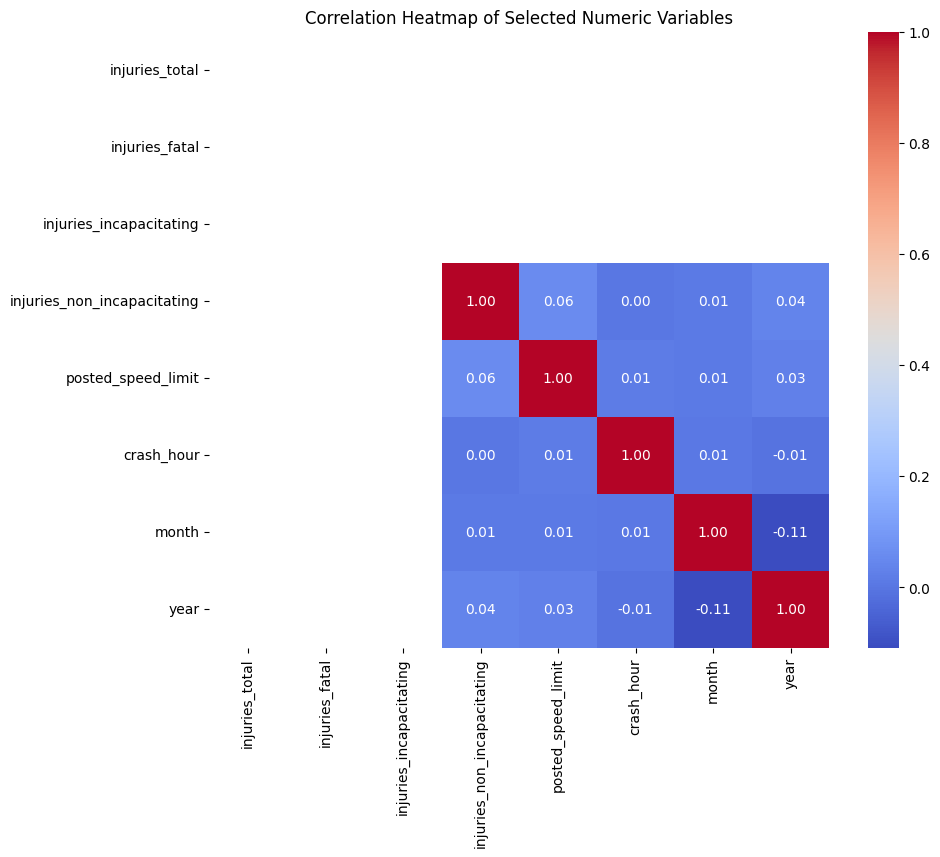

In [12]:
# 10. Correlation Heatmap of Selected Numeric Variables
plt.figure(figsize=(10, 8))
numeric_cols = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 
                'injuries_non_incapacitating', 'posted_speed_limit', 'crash_hour', 'month', 'year']
available_numeric = [col for col in numeric_cols if col in df.columns]
corr = df[available_numeric].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Numeric Variables")
plt.show()

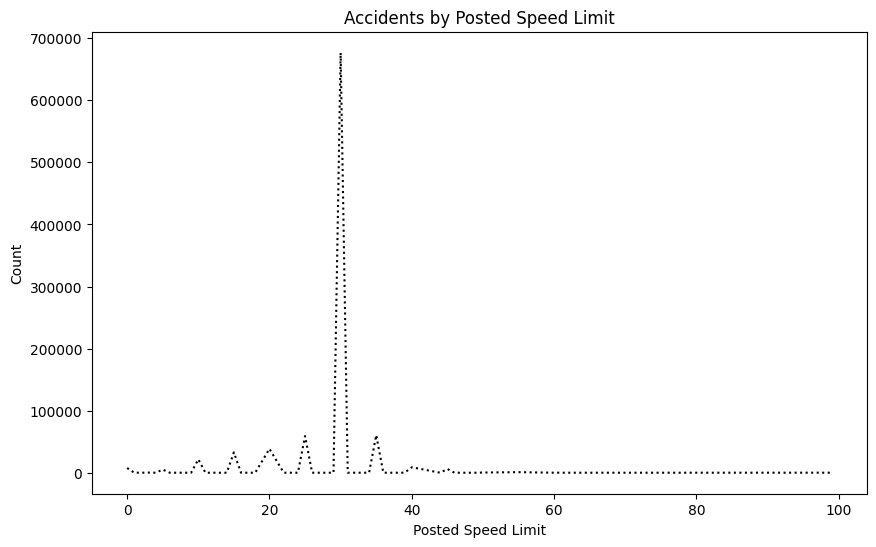

In [13]:
# 11. Accidents by Posted Speed Limit
plt.figure(figsize=(10, 6))
if 'posted_speed_limit' in df.columns:
    df['posted_speed_limit'].value_counts().sort_index().plot(kind='line',color='Black', linestyle=':')
    plt.title("Accidents by Posted Speed Limit")
    plt.xlabel("Posted Speed Limit")
    plt.ylabel("Count")
    plt.show()
else:
    print("Column 'posted_speed_limit' not found in dataset.")

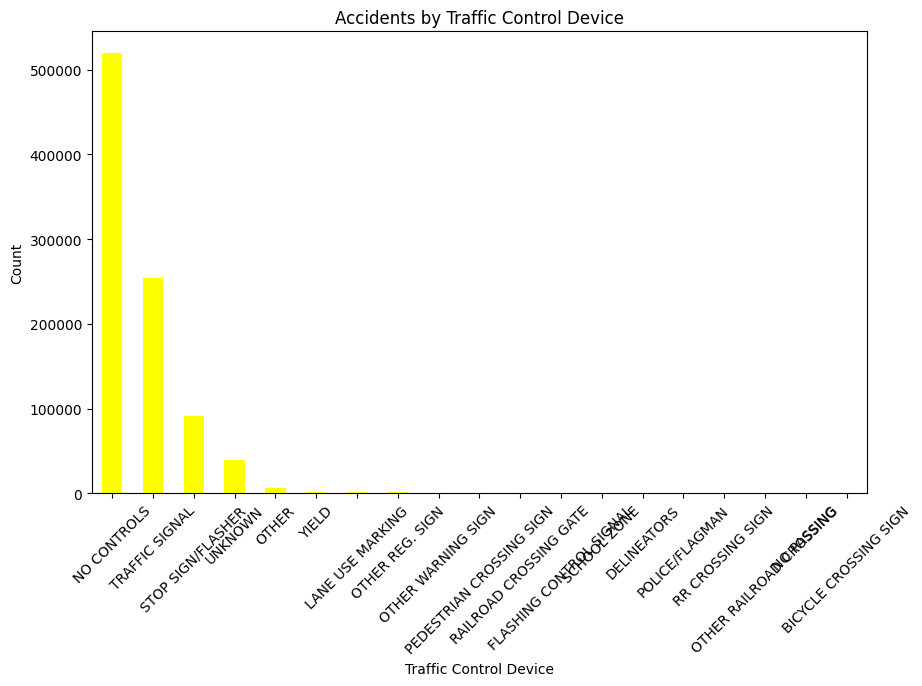

In [14]:
# 12. Accidents by Traffic Control Device
plt.figure(figsize=(10, 6))
if 'traffic_control_device' in df.columns:
    df['traffic_control_device'].value_counts().plot(kind='bar',color='Yellow')
    plt.title("Accidents by Traffic Control Device")
    plt.xlabel("Traffic Control Device")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'traffic_control_device' not found in dataset.")

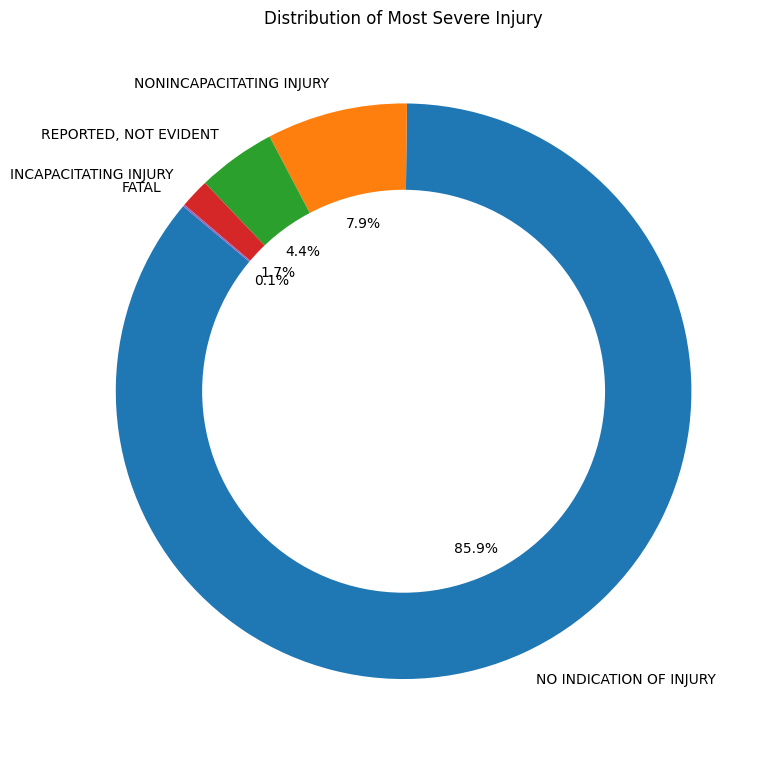

In [15]:
# 13. Donut Chart: Distribution of Most Severe Injury
plt.figure(figsize=(8, 8))
if 'most_severe_injury' in df.columns:
    counts = df['most_severe_injury'].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    # Create a white circle to transform the pie chart into a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title("Distribution of Most Severe Injury")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'most_severe_injury' not found in dataset.")

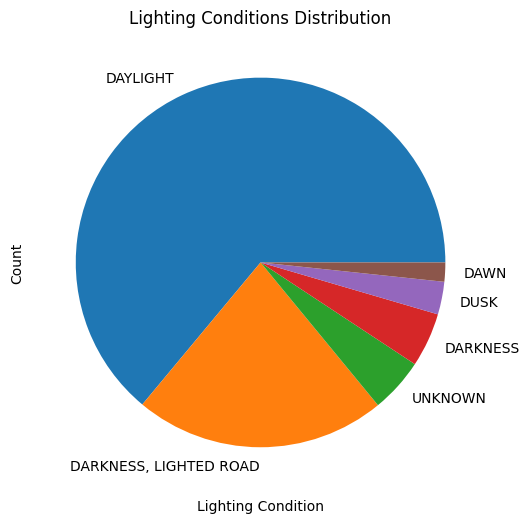

In [16]:
# 14. Lighting Conditions Distribution
plt.figure(figsize=(10, 6))
if 'lighting_condition' in df.columns:
    df['lighting_condition'].value_counts().plot(kind='pie')
    plt.title("Lighting Conditions Distribution")
    plt.xlabel("Lighting Condition")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'lighting_condition' not found in dataset.")

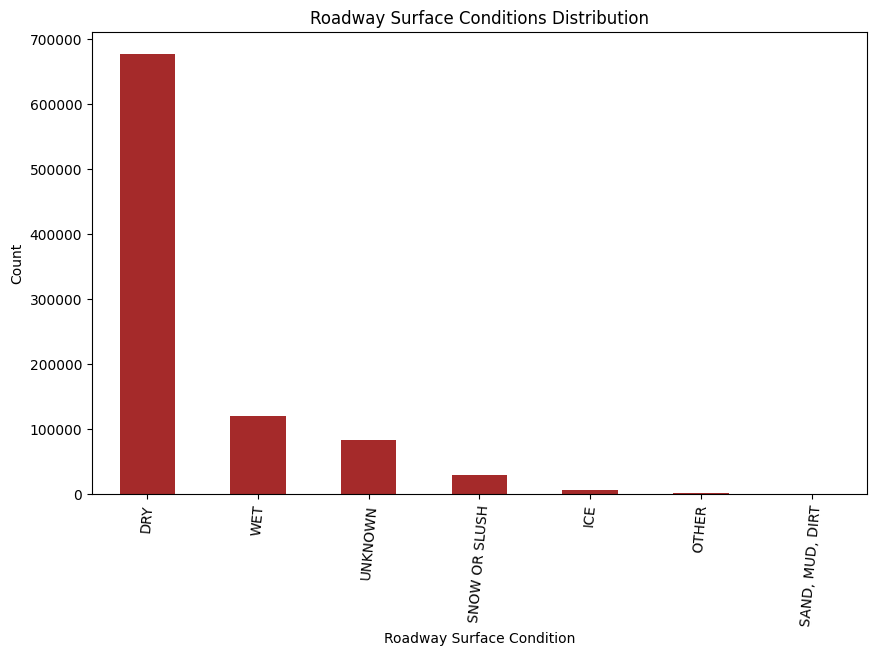

In [17]:
# 15. Roadway Surface Conditions Distribution
plt.figure(figsize=(10, 6))
if 'roadway_surface_cond' in df.columns:
    df['roadway_surface_cond'].value_counts().plot(kind='bar',color='Brown')
    plt.title("Roadway Surface Conditions Distribution")
    plt.xlabel("Roadway Surface Condition")
    plt.ylabel("Count")
    plt.xticks(rotation=85)
    plt.show()
else:
    print("Column 'roadway_surface_cond' not found in dataset.")

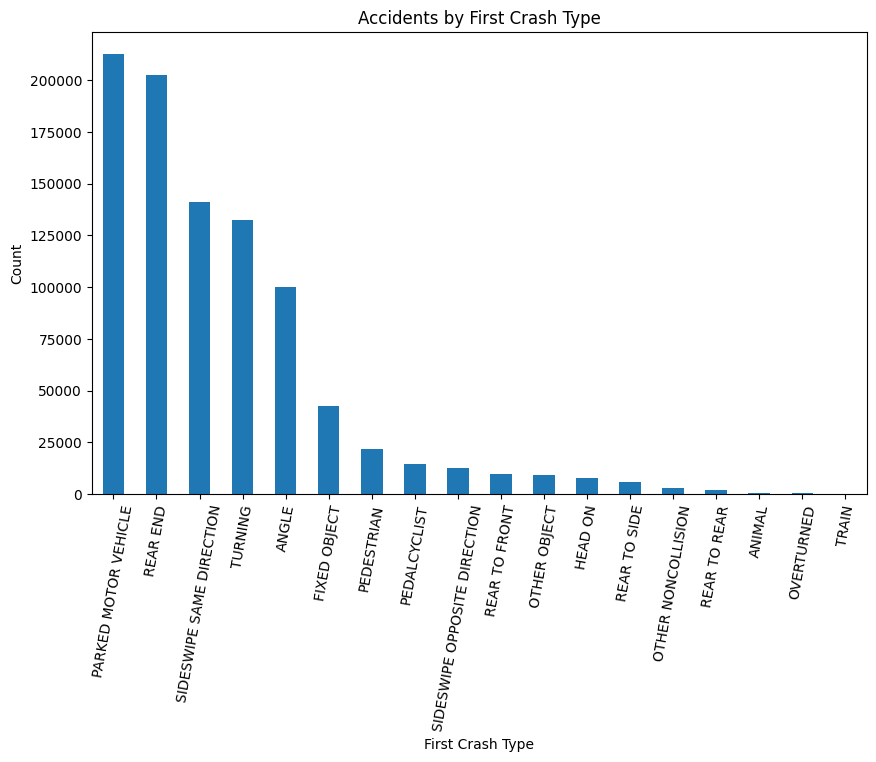

In [18]:
# 16. Accidents by First Crash Type
plt.figure(figsize=(10, 6))
if 'first_crash_type' in df.columns:
    df['first_crash_type'].value_counts().plot(kind='bar')
    plt.title("Accidents by First Crash Type")
    plt.xlabel("First Crash Type")
    plt.ylabel("Count")
    plt.xticks(rotation=80)
    plt.show()

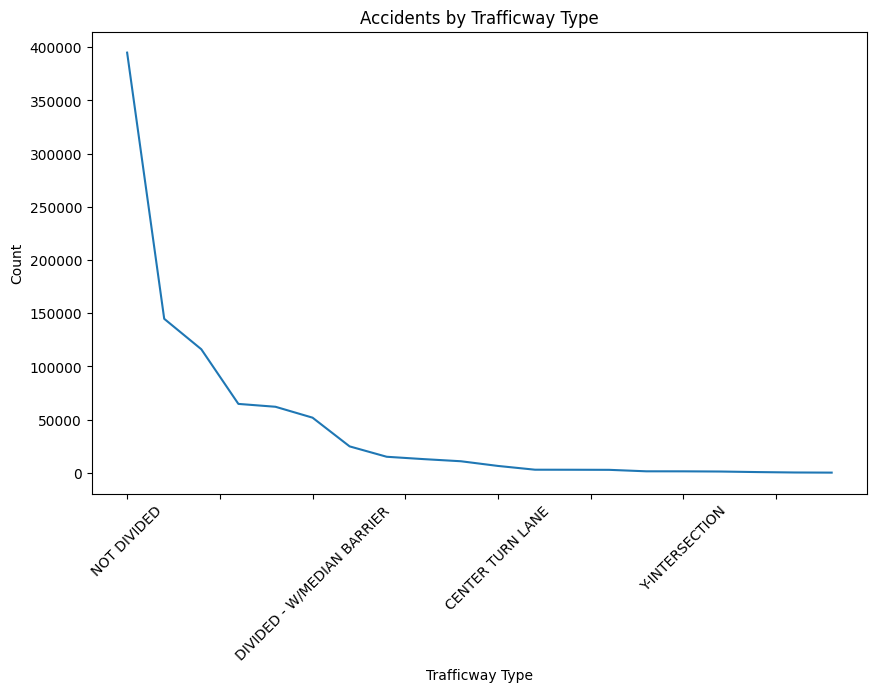

In [19]:
# 17. Accidents by Trafficway Type
plt.figure(figsize=(10, 6))
if 'trafficway_type' in df.columns:
    df['trafficway_type'].value_counts().plot(kind='line')
    plt.title("Accidents by Trafficway Type")
    plt.xlabel("Trafficway Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'trafficway_type' not found in dataset.")

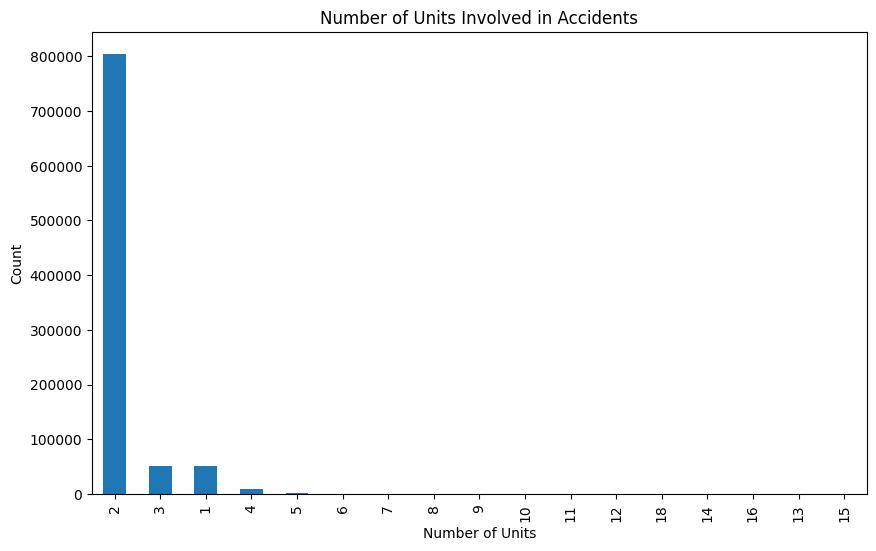

In [20]:
# 18. Number of Units Involved in Accidents
plt.figure(figsize=(10, 6))
if 'num_units' in df.columns:
    df['num_units'].value_counts().plot(kind='bar')
    plt.title("Number of Units Involved in Accidents")
    plt.xlabel("Number of Units")
    plt.ylabel("Count")
    plt.show()
else:
    print("Column 'num_units' not found in dataset.")

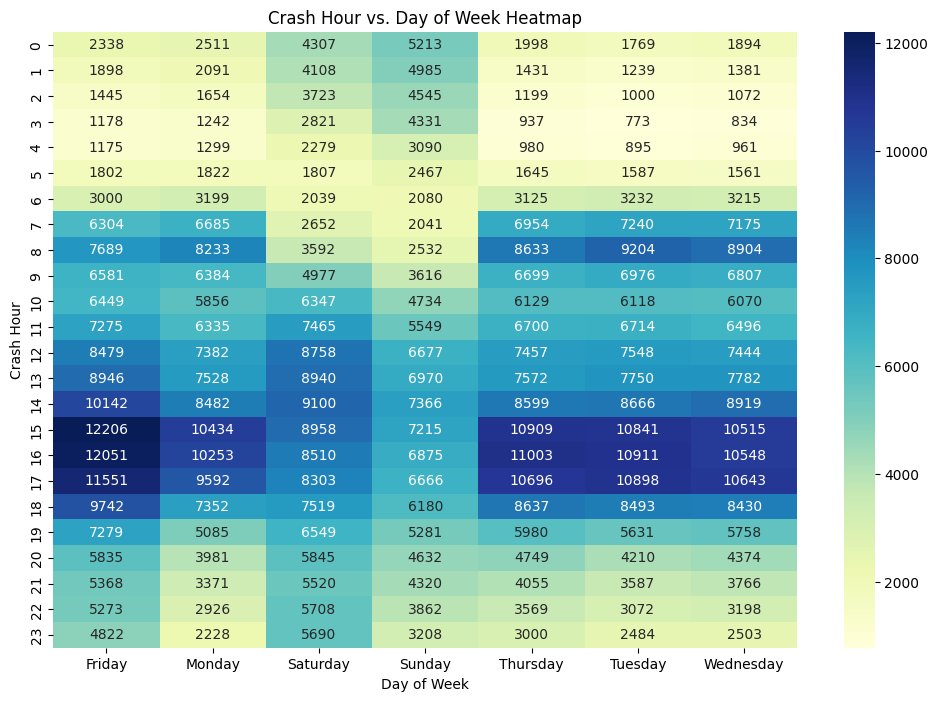

In [21]:
# 19. Crash Hour vs. Day of Week Heatmap
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(df['crash_hour'], df['day_of_week'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Crash Hour vs. Day of Week Heatmap")
plt.xlabel("Day of Week")
plt.ylabel("Crash Hour")
plt.show()

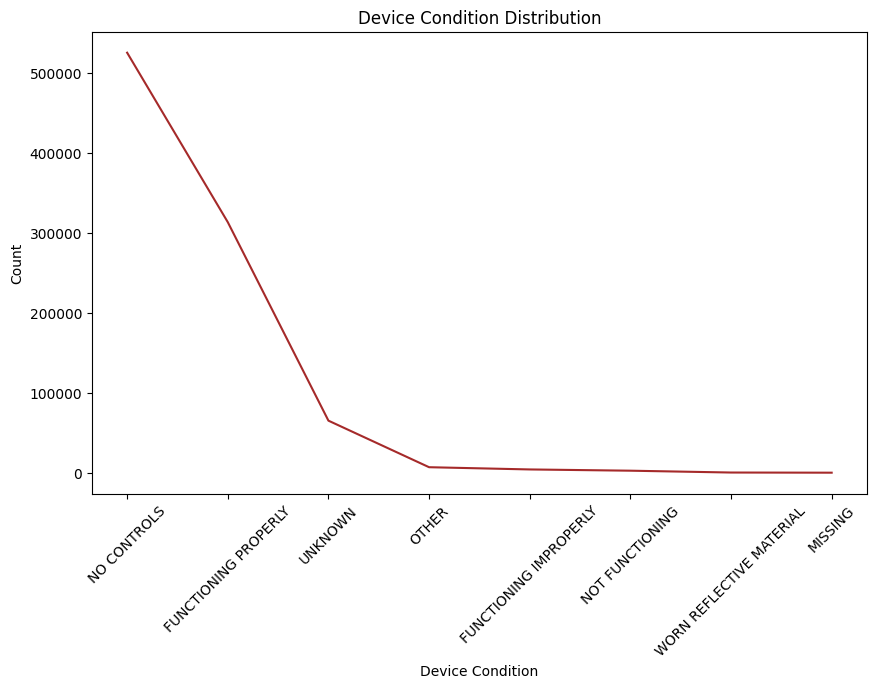

In [22]:
# 20. Device Condition Distribution
plt.figure(figsize=(10, 6))
if 'device_condition' in df.columns:
    df['device_condition'].value_counts().plot(kind='line',color='brown')
    plt.title("Device Condition Distribution")
    plt.xlabel("Device Condition")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'device_condition' not found in dataset.")